#### Column information
- PassengerId: 승객 id
- Survived: 생존 여부 (0 = No; 1 = Yes)
- Pclass: 객실 등급 (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name: 이름
- Sex: 성별
- Age: 나이
- Sibsp: 같이 탑승한 형제/배우자 수
- Parch: 같이 탑승한 부모/자녀 수
- Ticket: 티켓 번호
- Fare: 요금(영국 파운드)
- Cabin: 객실 번호
- Embarked: 승선 항구 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
titanic=pd.read_csv('titanic_train.csv')

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
titanic.shape

(891, 12)

In [57]:
titanic.info()    # Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# cabin: NaN이 너무 많아 열 삭제
titanic.drop(columns='Cabin', inplace=True)
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [60]:
# age
titanic['Age'].mean()

29.69911764705882

In [61]:
titanic.groupby('Pclass').agg({'Age':'mean'})    # 선실등급간 나이 평균 차이 많이 남

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [62]:
titanic.groupby('Sex').agg({'Age':'mean'})

,Age
Sex,
female,27.915709
male,30.726645


In [63]:
# age: 등급별 평균값으로 대체
titanic['Age'].fillna(round(titanic.groupby('Pclass')['Age'].transform('mean')), inplace=True)

In [64]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [65]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [66]:
# Embarked는 NaN이 많지 않으므로 행 삭제
titanic.dropna(inplace=True)

In [67]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [68]:
titanic.shape

(889, 11)

In [69]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
titanic.reset_index(inplace=True)

In [71]:
# probability
titanic['Survived'].mean()

0.38245219347581555

In [72]:
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Countplot

<AxesSubplot:xlabel='Survived', ylabel='count'>

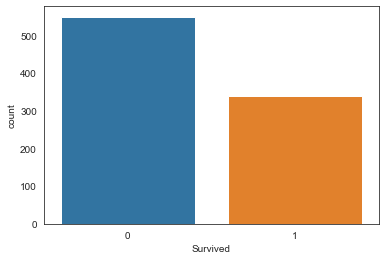

In [73]:
sns.countplot(x='Survived', data=titanic)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

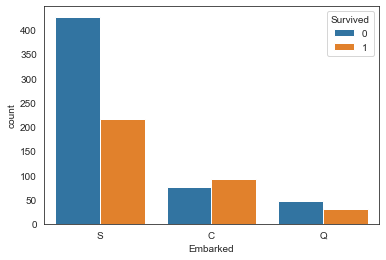

In [74]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)

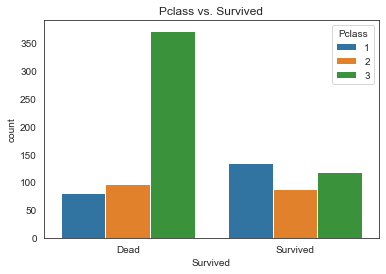

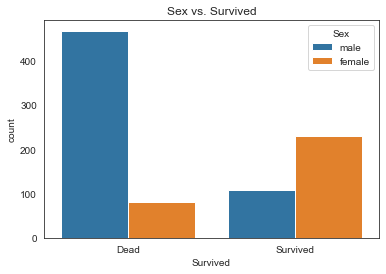

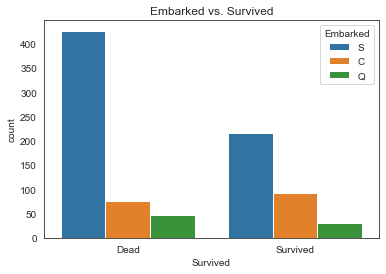

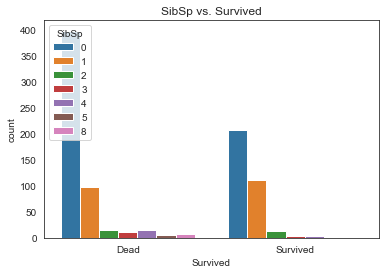

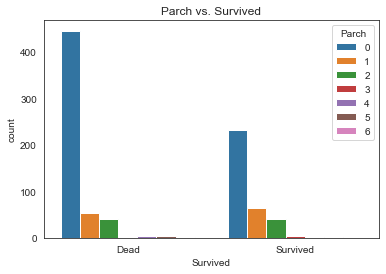

In [75]:
features=['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

for feature in features:
    sns.countplot(x='Survived', hue=feature, data=titanic)
    plt.xticks([0,1], ['Dead', 'Survived'])
    plt.title(f"{feature} vs. Survived")
    plt.show()

#### histogram

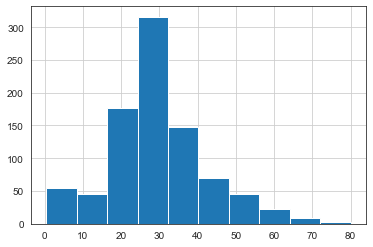

In [76]:
sns.set_style('white')

titanic['Age'].hist()
plt.show()

(array([ 36.,  19.,  63., 103.,  65.,  24.,  21.,   8.,   0.,   1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

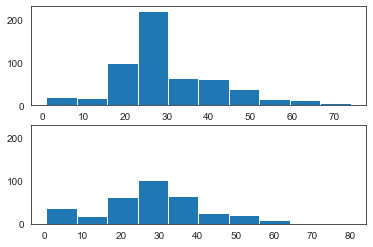

In [77]:
fig, ax = plt.subplots(2,1, sharey=True)

ax[0].hist(titanic[titanic['Survived']==0]['Age'])
ax[1].hist(titanic[titanic['Survived']==1]['Age'])

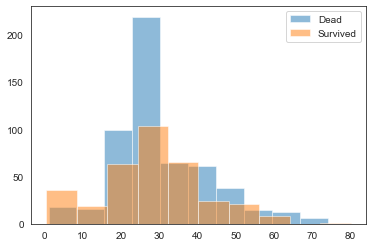

In [78]:
plt.hist(titanic[titanic['Survived']==0]['Age'], alpha=0.5, label='Dead')
plt.hist(titanic[titanic['Survived']==1]['Age'], alpha=0.5, label='Survived')
plt.legend()
plt.show()

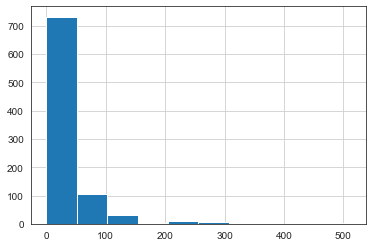

In [79]:
titanic['Fare'].hist()
plt.show()

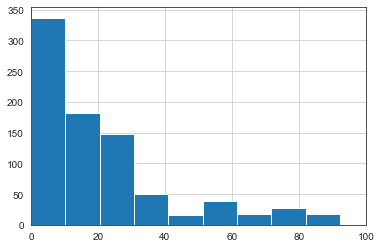

In [80]:
titanic['Fare'].hist(bins=50)
plt.xlim(0,100)
plt.show()

(array([233.,  68.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

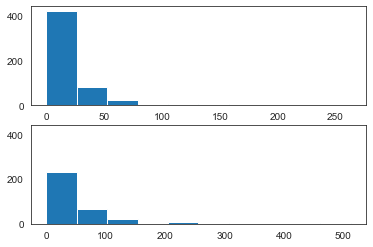

In [81]:
fig, ax = plt.subplots(2,1, sharey=True)

ax[0].hist(titanic[titanic['Survived']==0]['Fare'])
ax[1].hist(titanic[titanic['Survived']==1]['Fare'])

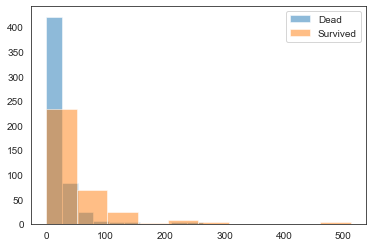

In [82]:
plt.hist(titanic[titanic['Survived']==0]['Fare'], alpha=0.5, label='Dead')
plt.hist(titanic[titanic['Survived']==1]['Fare'], alpha=0.5, label='Survived')
plt.legend()
plt.show()

#### Age
- 생존자와 사망자의 분포 shape은 비슷하지만 사망자의 경우 20대와 다른 나이대의 차이가 크다
- 생존자가 사망자보다 더 많은 연령대는 오직 0-10세이다

#### Fare
- 사망자의 경우 0-25 달러가 주를 이룬다
- 생존자의 경우 높은 이상치가 많다 - 이는 요금이 비싼 1등급 선실로 추정할 수 있다
- 즉 사망자의 경우 낮은 요금을 지불한 경우가 더 많으며, 생존자의 경우 높은 요금을 지불한 경우가 포착된다

#### Box plot

<AxesSubplot:ylabel='Fare'>

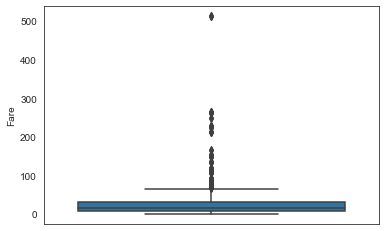

In [83]:
sns.boxplot(y=titanic['Fare'])

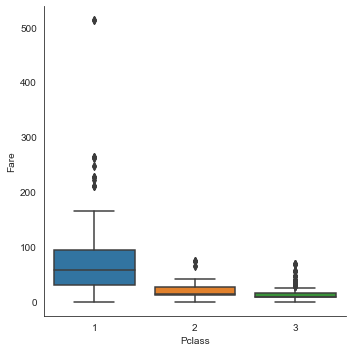

In [84]:
sns.catplot(x='Pclass', y='Fare',data=titanic, kind='box')
plt.show()

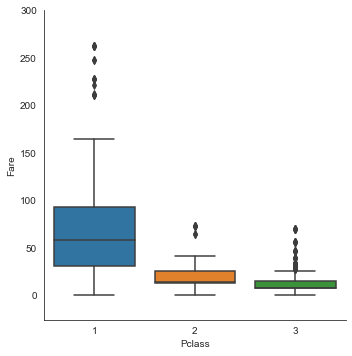

In [85]:
sns.catplot(x='Pclass', y='Fare',data=titanic, kind='box')
plt.ylim(top=300)
plt.show()

In [86]:
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [87]:
titanic.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [88]:
titanic.groupby('Pclass')['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

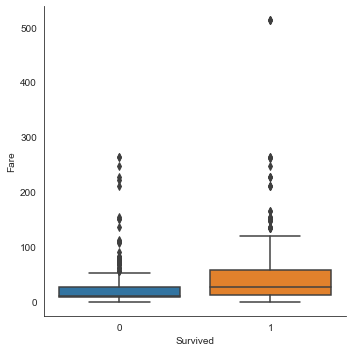

In [89]:
sns.catplot(x='Survived', y='Fare', kind='box', data=titanic)
plt.show()

#### Age
- 사망자의 경우 Q1과 median 사이 간격이 짧다, 즉 Q1과 Median 사이 약 20~25세에 데이터가 밀집되어있다
- 생존자의 경우 낮은 이상치가 없다, 즉 0-10세의 유아가 생존자에 많다
- 최고령자는 생존자 그룹에 속하지만 65-75세의 대부분은 사망한 것으로 보인다

#### Fare
- 사망자의 경우 box의 크기가 매우 작다, 즉 Q1-median-Q3간 간격이 좁다 - 생존자보다 훨씬 right-skewed한 분포를 보인다
- 가장 비싼 요금을 낸 탑승자는 생존자 그룹에 속한다 (이상치의 가능성도 배제할 순 없다)
- 사망자 그룹과 생존자 그룹의 Q1과 median은 비슷한 반면 Q3에서 큰 차이를 보인다 - 비싼 요금을 낸 탑승자가 생존했을 확률이 높다

#### Scatter plot

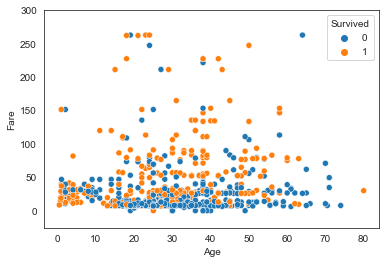

<Figure size 2160x720 with 0 Axes>

In [90]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.ylim(top=300)
plt.figure(figsize=(30,10))
plt.show()

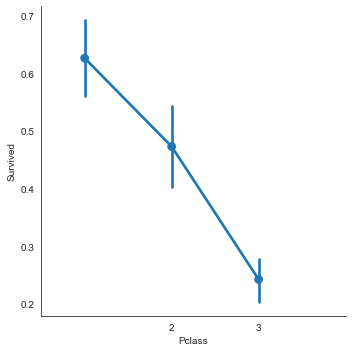

In [91]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='point')
plt.xticks([1,2,3])
plt.show()

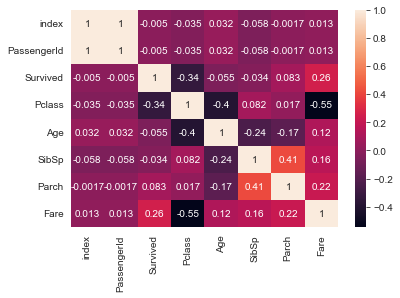

In [92]:
sns.heatmap(titanic.corr(), annot=True)
plt.show()

In [ ]:
# subplot을 통해 insight를 정리하자

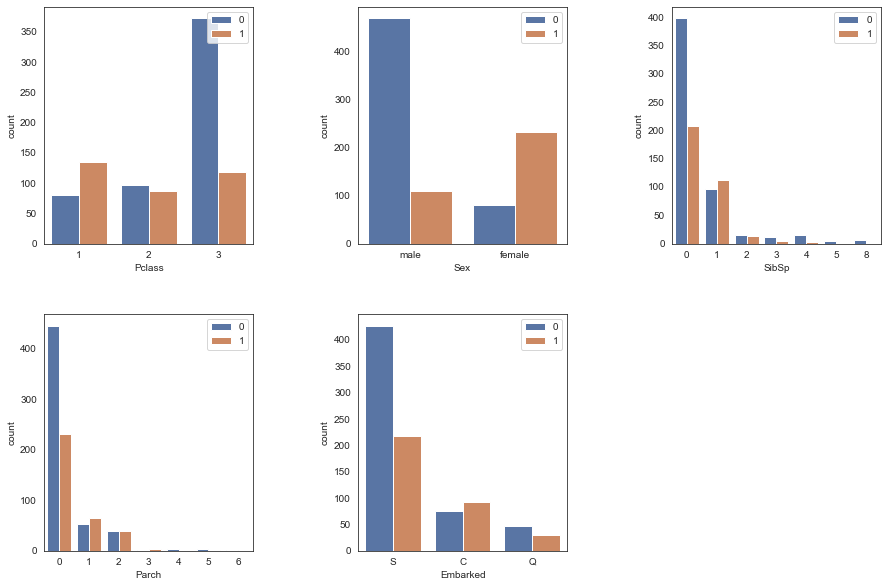

In [116]:
ctg_features=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,3) 
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

for idx, feature in enumerate(ctg_features):
    ax=plt.subplot(grid[idx])
    sns.countplot(x=feature, hue='Survived', data=titanic, ax=ax, palette='deep')
    plt.legend(loc='upper right')

#### Pclass
- 1등급 선실은 생존자가 더 많은 반면, 3등급 선실은 사망자가 확연히 많다
- 선실 등급은 생존 여부와 관련성이 있을 것으로 추정된다

#### Sex
- 남성은 사망자 비율이 월등히 높으며 여성은 생존자가 더 많다
- 성별과 생존 여부는 관련성이 있을 것으로 추정된다

#### SibSp, Parch
- 동승자는 0-1인 비율이 높으며 혼자 탑승한 경우(Sibsp or Parch=0) 사망자가 생존자보다 두배 가량 많은 반면 이외의 경우는 비슷하거나 생존자가 더 많기도 하다

#### Embarked
- 통계상 S 항구에 도착한 사람의 비율이 가장 높으며, S 항구은 사망자가 생존자보다 두배 가량 많은 반면 C와 Q 항구는 차이가 크지 않다

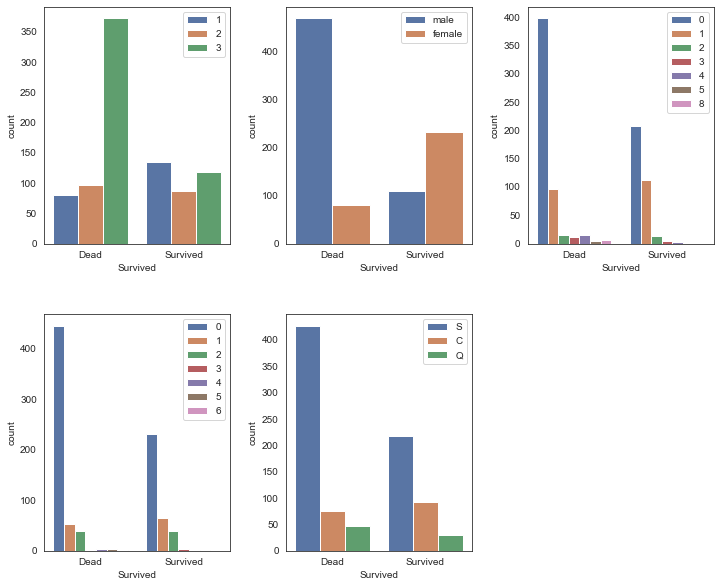

In [113]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,3) 
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3) 

for idx, feature in enumerate(ctg_features):
    ax=plt.subplot(grid[idx])
    sns.countplot(x='Survived', hue=feature, data=titanic, ax=ax, palette='deep')
    plt.xticks([0,1], ['Dead', 'Survived'])
    plt.legend(loc='upper right')

#### Pclass
- 사망자 중 3등급 선실이 압도적으로 많은 비율을 차지하는 한편 생존자는 비슷한 분포를 보인다
- 사망과 등급선실은 관련이 있을 것이다

#### Sex
- 사망자의 약 5/6는 남성이며 생존자의 약 2/3은 여성이다
- 생존여부와 성별은 관련이 있을 것이다

#### SibSp, Parch
- 통계적으로 동승자가 0명인 경우가 가장 많다
- Dead와 Survived 사이 차이를 크게 보이는 범례는 오직 동승자가 0명인 경우이다.

#### Embarked
- 생존과 사망의 경우 모두 S 항구 사람들의 비율이 가장 높다
- Dead와 Survived 사이 차이를 크게 보이는 범례는 오직 S 항구이다.

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Companion', ylabel='count'>

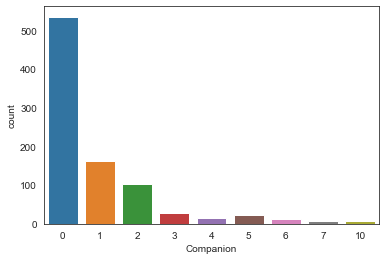

In [114]:
## SibSp와 Parch가 유사한 분포를 보이므로 동승자라는 새로운 변수 (SibSp+Parch)를 생성해 countplot을 그려보자
titanic['Companion']=titanic['SibSp']+titanic['Parch']
sns.countplot(titanic['Companion'])

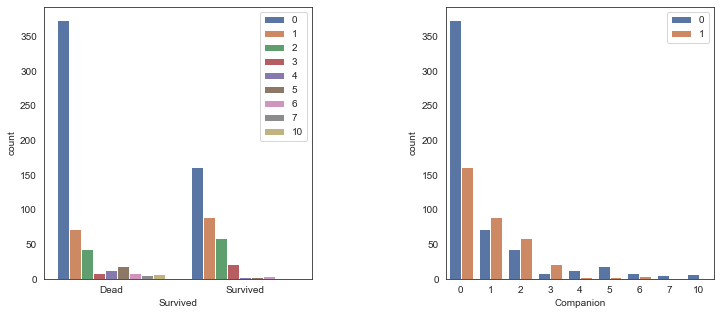

In [115]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(1,2) 
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

sns.countplot(x='Survived', hue='Companion', data=titanic, ax=plt.subplot(grid[0]), palette='deep')
plt.xticks([0,1], ['Dead', 'Survived'])
plt.legend(loc='upper right')

sns.countplot(x='Companion', hue='Survived', data=titanic, ax=plt.subplot(grid[1]), palette='deep')
plt.legend(loc='upper right')

- 마찬가지로 Dead와 Survived 사이 가장 큰 차이를 보이는 것은 동승자가 0명인 경우이며 이외에는 Dead와 Survived 사이 큰 차이를 보이지 않는다
- Companion이 0명인 경우 두배가량 사망자가 많으며 이외에는 생존자와 사망자가 비슷하게 나타난다

##### 생존율 - bar plot, heatmap, 연령 그룹 변수 만들기

In [93]:
# Survived의 mean은 생존율 - 사망이 0, 생존이 1이기 때문
# 생존율에 대한 dataframe을 만들고 이에 대한 bar plot과 heatmap을 만들어보자

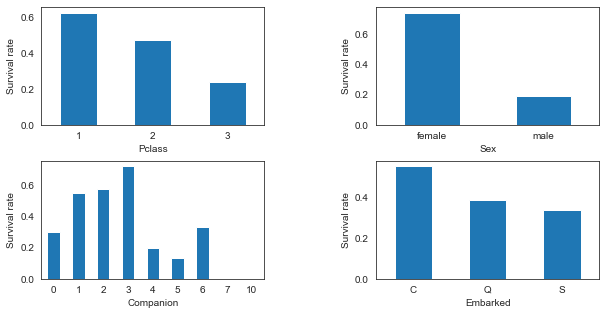

In [95]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,2) 
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

ctg_features_a=['Pclass', 'Sex', 'Companion','Embarked']

for idx, feature in enumerate(ctg_features_a):
    titanic_a=titanic.groupby(feature)['Survived'].mean()
    titanic_a.plot(kind='bar', ax=plt.subplot(grid[idx]))
    plt.xticks(rotation=0)
    plt.ylabel('Survival rate')

#### Pclass
- 선실등급이 낮아질수록 생존율이 낮아진다
- 선실등급에 따라 생존율엔 차이가 있다

#### Sex
- 여성의 생존율은 0.5를 넘는 반면, 남성의 생존율은 0.5보다 낮다
- 성별은 생존율에 차이를 만든다

#### Companion
- 동승자가 0명일 경우 생존율이 가장 낮을 것이라는 예측과는 달리 4-5명, 7명이상일 때 가장 낮은 생존율을 보인다
- 하지만 이는 class imbalance의 영향일 수 있다 - 동승자가 0명일 경우 생존율은 약 0.3으로 매우 낮음은 여전하다

#### Embarked
- S 항구 탑승객의 생존율이 가장 낮을 것이라는 예측대로 S 항구의 생존율이 가장 낮다

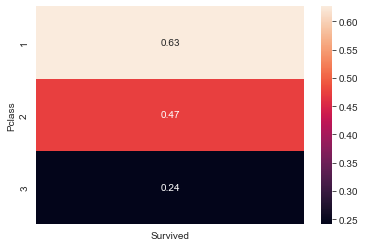

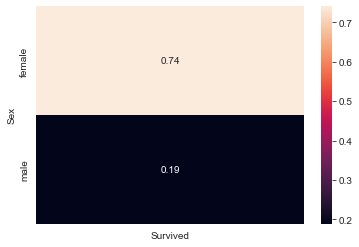

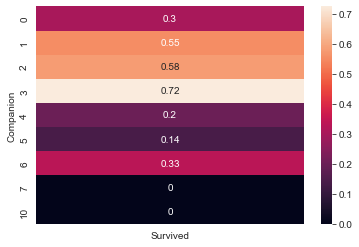

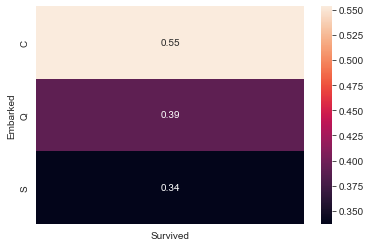

In [96]:
for feature in ctg_features_a:
    titanic_a=titanic.groupby(feature)['Survived'].mean()
    titanic_a=pd.DataFrame(titanic_a)
    sns.heatmap(titanic_a, annot=True)
    plt.show()

#### Pclass
- 선실등급이 낮아질수록 생존율이 낮아짐이 확연히 나타난다

#### Sex
- 여성과 남성의 생존율 차이가 확연히 큼을 확인할 수 있다
- 여성이 남성보다 생존율이 약 2배 높다

#### Companion
- 동승자가 1-3명일 때 비교적 높은 생존율을 보이며 이외의 경우 - 특히 동승자가 7명인 경우 - 에는 낮은 생존율을 보인다

#### Embarked
- S 항구의 생존율이 매우 낮다

In [97]:
# 연령대별 생존율 살피기
for idx, age in enumerate(titanic['Age']):
    agegroup=(age//10)*10
    titanic.loc[idx, 'AGEGP']=str(int(agegroup))

In [98]:
titanic[['Age', 'AGEGP']]

,Age,AGEGP
0,22.0,20
1,38.0,30
2,26.0,20
3,35.0,30
4,35.0,30
...,...,...
884,27.0,20
885,19.0,10
886,25.0,20
887,26.0,20


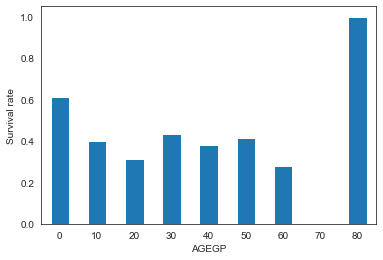

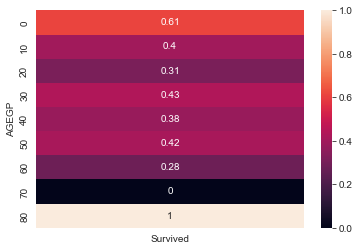

In [99]:
titanic_b=titanic.groupby('AGEGP')['Survived'].mean()
titanic_b.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Survival rate')
plt.show()

titanic_b=pd.DataFrame(titanic_b)
sns.heatmap(titanic_b, annot=True)
plt.show()

- 앞서 확인한 바와 같이 최고령그룹은 높은 생존율을, 6-70대는 매우 낮은 생존율을 보인다
- 예측한 바와 같이 0-10세 그룹이 높은 생존율을 보이며 20대 그룹이 특히 낮은 생존율을 보인다

In [103]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier() 

from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.2)
print(train.shape[0])
print(test.shape[0])

x_train=train[['Pclass', 'Companion', 'Age', 'Fare']]
y_train=train['Survived']
x_test=test[['Pclass', 'Companion', 'Age', 'Fare']]
y_test=test['Survived']

clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

711
178


0.6348314606741573

In [104]:
comparison = pd.DataFrame({'prediction': y_pred, 'ground_truth': y_test})
comparison

,prediction,ground_truth
525,1,1
834,0,0
432,0,0
715,0,1
731,0,0
...,...,...
667,0,0
26,0,0
101,1,0
611,0,1


In [106]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6292134831460674

In [ ]:
# DT의 과적합 문제를 완화하는 것이 RF
# 하지만 파라미터 조정 없이 러프하게 작동하니 AUC가 낮음
# GridSearch 필요!!

# categorical variable을 수치형으로 encoding해서 학습시켜야함

In [ ]:
# cabin 알파벳 split해보기 ?.?
# 알파벳에 따라 층수 달라짐 - Pclass의 구조도랑 같이 봐야겠음!

# 동승자 유무에 대한 0 or 1 변수 만들어보기

# 변수간 상관도에 대한 visualization 해보기